
## Assignmnet 7: Logistic Regression

### Author: Mahlet Melese
### Date: July 12, 2023

## 1. Introduction


- The primary objective of this project is to perform logistic regression analysis on insurance data.
- The data set is comprised of more than 14,000 observations of 1 response/dependent variable (which
indicates whether or not the new insurance product was purchased) and 14 explanatory/independent
variables.

## 2. Exploratory Data Analysis 

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler


In [11]:
    
# Downloading the csv file from my GitHub repo
data_url = "https://raw.githubusercontent.com/mahletbirku/-DAV-6150/main/M7_Data.csv" 
df = pd.read_csv(data_url, header=0)
df

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,Y,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,Y,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,Y,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,Y,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


#### Move taget column into the last column

In [12]:
temp_cols=df.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
df=df[new_cols]
df

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M,TARGET
0,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3,Y
1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39,Y
2,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27,Y
3,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3,Y
4,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3,Y
14012,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27,Y
14013,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3,Y
14014,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15,Y


- Map the target into 0 and 1 varibale

In [20]:
df['TARGET'] = df['TARGET'].map({'Y': 1, 'N': 0})

### Check the dataset shape

Knowing the amount of data we have is very important, because the quality of our analysis is depend on that.

In [21]:
# check the result
df.shape

(14016, 15)

#### Let's get some of the basic statistics of the  data.

- From the table above, for each feature we can get the mean, standard deviation, count, and other basic information that can tell about the data.

In [22]:
df.describe()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M,TARGET
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.0,14016.000000,14016.000000,14016.000000
mean,50.381778,37672.440068,35.882920,-710.950128,0.926299,0.533818,1.607877,1.918878,0.599458,379.161320,328.628207,2.0,35.882920,14.115582,0.429224
std,48.471790,44855.639209,12.974634,26702.329184,0.965212,0.498873,1.508991,1.686038,0.490026,92.612207,475.616525,0.0,12.974634,11.582550,0.494983
min,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000,0.000000
25%,2.000000,6741.500000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.919412,219.406925,2.0,25.000000,3.000000,0.000000
50%,3.000000,13514.500000,33.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,367.891493,237.656757,2.0,33.000000,15.000000,0.000000
75%,99.000000,62738.000000,43.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,399.744924,264.131538,2.0,43.000000,15.000000,1.000000
max,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000,1.000000


### Data types of all columns
Pandas.dtypes function helps us to display the data types of all columns as a series.

In [23]:
# Check the data types

df.dtypes

loyalty         int64
ID              int64
age             int64
city            int64
LOR             int64
prod_A          int64
type_A          int64
type_B          int64
prod_B          int64
turnover_A    float64
turnover_B    float64
contract        int64
age_P           int64
lor_M           int64
TARGET          int64
dtype: object

### Check null values
I checked null valus which is a fundamental part of data cleaning. I will use Pandas. isnull() and .sum() functions together to display count of missing values of each attribute.

In [24]:
# recommended code 

print (df.isnull().sum())

loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
TARGET        0
dtype: int64


- There is no missing data.

### Data Visualization

#### Histogram

- A histogram is a value distribution plot of numerical columns. Let's do a histogram of 16 attributes 

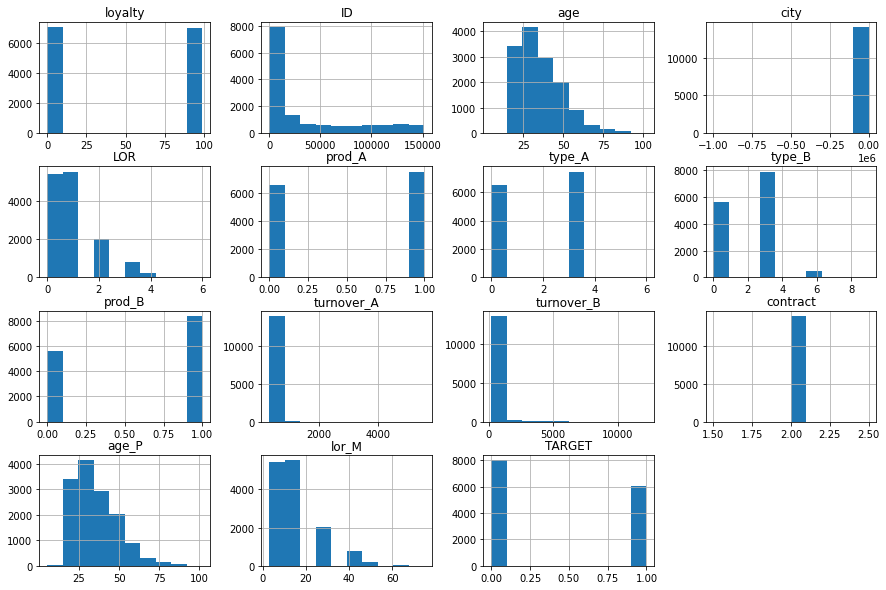

In [25]:
df.hist(bins=10, figsize=(15, 10), layout=(4, 4));


# 5. Logistic Regression Model Construction & Evaluation 

#### Feature selection using correlation

In [26]:
import seaborn as sns

correlation = df.corr()
correlation


,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M,TARGET
loyalty,1.000000,0.199605,-0.038121,0.010565,-0.671148,-0.624775,-0.623947,-0.730219,-0.755173,0.007024,-0.184830,NaN,-0.038121,-0.671148,0.251953
ID,0.199605,1.000000,0.194402,-0.009063,-0.151171,-0.263087,-0.261481,-0.271323,-0.277798,0.183203,-0.073769,NaN,0.194402,-0.151171,0.753435
age,-0.038121,0.194402,1.000000,0.001018,0.089640,-0.143813,-0.142519,0.020026,-0.059584,0.135887,0.251625,NaN,1.000000,0.089640,0.253827
city,0.010565,-0.009063,0.001018,1.000000,0.011810,0.001803,0.001902,0.006637,0.005420,-0.003383,0.005508,NaN,0.001018,0.011810,0.001568
LOR,-0.671148,-0.151171,0.089640,0.011810,1.000000,0.569822,0.569003,0.770491,0.754924,0.009987,0.158571,NaN,0.089640,1.000000,-0.185280
prod_A,-0.624775,-0.263087,-0.143813,0.001803,0.569822,1.000000,0.995778,0.816231,0.874710,-0.017631,-0.006176,NaN,-0.143813,0.569822,-0.321735
type_A,-0.623947,-0.261481,-0.142519,0.001902,0.569003,0.995778,1.000000,0.820344,0.871017,-0.016991,-0.006762,NaN,-0.142519,0.569003,-0.318775
type_B,-0.730219,-0.271323,0.020026,0.006637,0.770491,0.816231,0.820344,1.000000,0.930338,-0.028940,0.303354,NaN,0.020026,0.770491,-0.337026
prod_B,-0.755173,-0.277798,-0.059584,0.005420,0.754924,0.874710,0.871017,0.930338,1.000000,-0.034509,0.149084,NaN,-0.059584,0.754924,-0.341924
turnover_A,0.007024,0.183203,0.135887,-0.003383,0.009987,-0.017631,-0.016991,-0.028940,-0.034509,1.000000,0.128613,NaN,0.135887,0.009987,0.234012


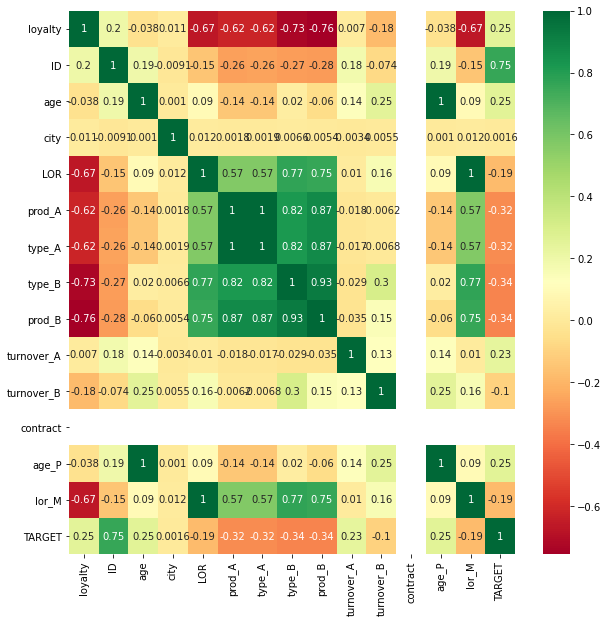

In [27]:
plt.subplots(figsize=(10,10))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()

- As noted, there are 14 features, and based on the correlation map and domain knowledge, I will eliminate some features based on the fact that they wouldn't be relevant for the target variable. These are ID,Age of partner in years(Age_p), Length of relationship in years(LOR), Length of relationship in months(LOR_m), contract, city, and loyalty. 

In [28]:
df.columns

Index(['loyalty', 'ID', 'age', 'city', 'LOR', 'prod_A', 'type_A', 'type_B',
       'prod_B', 'turnover_A', 'turnover_B', 'contract', 'age_P', 'lor_M',
       'TARGET'],
      dtype='object')

In [29]:
new_df =df[['age', 'prod_A', 'type_A', 'type_B', 'prod_B',
       'turnover_A', 'turnover_B','TARGET',
       ]]
new_df

,age,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,TARGET
0,66,0,0,0,0,333.561114,264.721010,1
1,45,1,3,3,1,394.735699,284.904978,1
2,42,1,3,6,1,342.180990,1175.589721,1
3,31,0,0,0,0,453.757916,242.341754,1
4,62,0,0,0,0,384.577469,287.008370,1
...,...,...,...,...,...,...,...,...
14011,30,0,0,0,0,386.434278,284.309508,1
14012,27,1,3,3,1,376.842591,266.993794,1
14013,26,0,0,0,0,434.805703,284.629361,1
14014,75,1,3,3,1,366.273857,270.573265,1


### Model 1

- For model 1, let's use variables such as 'age', 'prod_A', 'type_A', 'type_B', 'prod_B',
 'turnover_A', and 'turnover_B'

In [30]:
X = new_df.drop('TARGET', axis=1).values
Y = new_df['TARGET'].values

- Cross validation and Scaling 

In [31]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2)

In [32]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler().fit(x_train)
x_train=min_max_scaler.transform(x_train)
x_test=min_max_scaler.transform(x_test)

#### Model training

In [33]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()
model_1.fit(x_train, y_train)

LogisticRegression()

#### Predcition and Evaluation

In [34]:
y_pred = model_1.predict(x_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1598
           1       0.71      0.65      0.68      1206

    accuracy                           0.74      2804
   macro avg       0.73      0.72      0.73      2804
weighted avg       0.73      0.74      0.73      2804



**Here, we can see that the test accuracy is 74%. Class N(0) got the highest F1 score which is 77%.**

### Model 2

- For model 2, let's use all variables except product A's variables such as 'age', 'type_B', 'prod_B',
, and 'turnover_B'

In [40]:
new_df =df[['age', 'type_B', 'prod_B',
      'turnover_B','TARGET',
       ]]
new_df



,age,type_B,prod_B,turnover_B,TARGET
0,66,0,0,264.721010,1
1,45,3,1,284.904978,1
2,42,6,1,1175.589721,1
3,31,0,0,242.341754,1
4,62,0,0,287.008370,1
...,...,...,...,...,...
14011,30,0,0,284.309508,1
14012,27,3,1,266.993794,1
14013,26,0,0,284.629361,1
14014,75,3,1,270.573265,1


In [41]:
X = new_df.drop('TARGET', axis=1).values
Y = new_df['TARGET'].values

- Cross validation and scaling

In [42]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2)

# scaling
min_max_scaler = MinMaxScaler().fit(x_train)
x_train=min_max_scaler.transform(x_train)
x_test=min_max_scaler.transform(x_test)

#### Model training

In [43]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression()
model_2.fit(x_train, y_train)

LogisticRegression()

#### Predcition and Evaluation

In [44]:
y_pred = model_2.predict(x_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1605
           1       0.69      0.59      0.63      1199

    accuracy                           0.71      2804
   macro avg       0.70      0.69      0.70      2804
weighted avg       0.71      0.71      0.70      2804



**Here, we can see that the test accuracy is 71%. Class N(0) got the highest F1 score which is 76%.**

### Model 3

- For model 3, let's use all variables except product B's variables such as 'age', 'type_A', 'prod_A',
, and 'turnover_A'

In [46]:
new_df =df[['age', 'type_A', 'prod_A', 'turnover_A','TARGET']]
new_df

,age,type_A,prod_A,turnover_A,TARGET
0,66,0,0,333.561114,1
1,45,3,1,394.735699,1
2,42,3,1,342.180990,1
3,31,0,0,453.757916,1
4,62,0,0,384.577469,1
...,...,...,...,...,...
14011,30,0,0,386.434278,1
14012,27,3,1,376.842591,1
14013,26,0,0,434.805703,1
14014,75,3,1,366.273857,1


In [47]:
X = new_df.drop('TARGET', axis=1).values
Y = new_df['TARGET'].values

- Cross validation and scaling

In [48]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2)

# scaling
min_max_scaler = MinMaxScaler().fit(x_train)
x_train=min_max_scaler.transform(x_train)
x_test=min_max_scaler.transform(x_test)

#### Model training

In [49]:
from sklearn.linear_model import LogisticRegression

model_3 = LogisticRegression()
model_3.fit(x_train, y_train)

LogisticRegression()

#### Predcition and Evaluation

In [50]:
y_pred = model_3.predict(x_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1561
           1       0.69      0.62      0.66      1243

    accuracy                           0.71      2804
   macro avg       0.71      0.70      0.70      2804
weighted avg       0.71      0.71      0.71      2804



**Here, we can see that the test accuracy is 71%. Class N(0) got the highest F1 score which is 75%.**

## 6. Conclusions

**To summarize, within this project, I conducted an analysis on a publicly available dataset employing logistic regression model for classification purpose. I perfomed EDA, Feature selection, Model training and evaluation. I employed 3 models using different independent variables. I used Accuracy and F1 score as metrics to compare models. Over all, using accuracy as a metric, Model 1 outperfomed Model 2 and Model 3 with a test accurcay of 74. In addition Class N(0) has the higher 1 score compared to class Y(1)%.**
